IMPORTING LIBRARIES

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

LOADING THE DATA


In [49]:
# creating raw dataframe
raw_df = pd.read_csv('Delhi_v2.csv')

ANALYSING DATA

In [50]:
# viewing first 5 rows of raw dataframe
raw_df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [51]:
raw_df.shape

(7738, 18)

In [52]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [53]:
raw_df.isna().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [54]:
raw_df.nunique()

Unnamed: 0          7738
price                584
Address             4145
area                1102
latitude            2942
longitude           2912
Bedrooms               9
Bathrooms              9
Balcony               10
Status                 2
neworold               2
parking               65
Furnished_status       3
Lift                  11
Landmarks           2612
type_of_building       2
desc                4181
Price_sqft          3946
dtype: int64

In [55]:
# identifying and seperating numerical and categorical columns of dataframe
numerical_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=object).columns.tolist()

Text(0.5, 1.0, 'CORRELATION MATRIX')

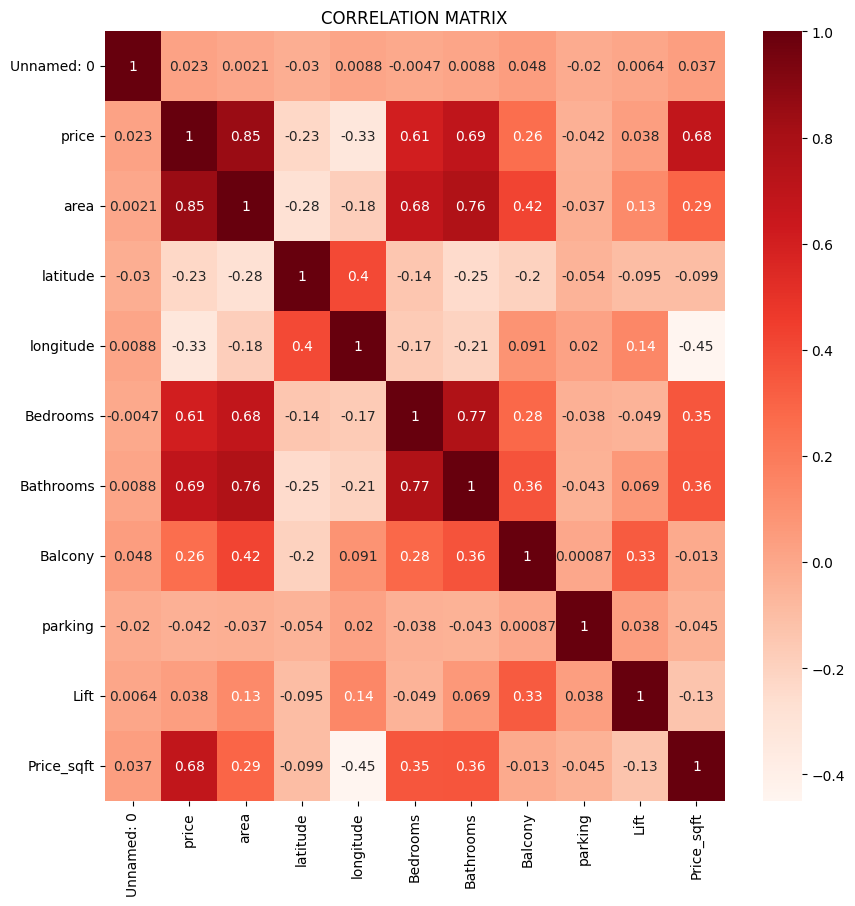

In [56]:
# analysing correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(raw_df[numerical_cols].corr(),cmap='Reds',annot=True)
plt.title("CORRELATION MATRIX")


In [57]:
# dropping unimportant columns
dropped_cols = ['Unnamed: 0','Price_sqft','Lift','parking','desc','Landmarks','Address','latitude','longitude','Balcony']

In [58]:
raw_df.drop(dropped_cols,axis=1,inplace=True)

In [59]:
# dataframe after dropping columns
raw_df.head()

,price,area,Bedrooms,Bathrooms,Status,neworold,Furnished_status,type_of_building
0,5600000.0,1350.0,3.0,3.0,Under Construction,New Property,NaN,Flat
1,8800000.0,1490.0,3.0,3.0,Ready to Move,New Property,Semi-Furnished,Flat
2,16500000.0,2385.0,4.0,5.0,Ready to Move,New Property,Unfurnished,Flat
3,3810000.0,1050.0,2.0,2.0,NaN,New Property,Unfurnished,Flat
4,6200000.0,1350.0,2.0,2.0,Ready to Move,Resale,NaN,Flat


VISUALISING DATA

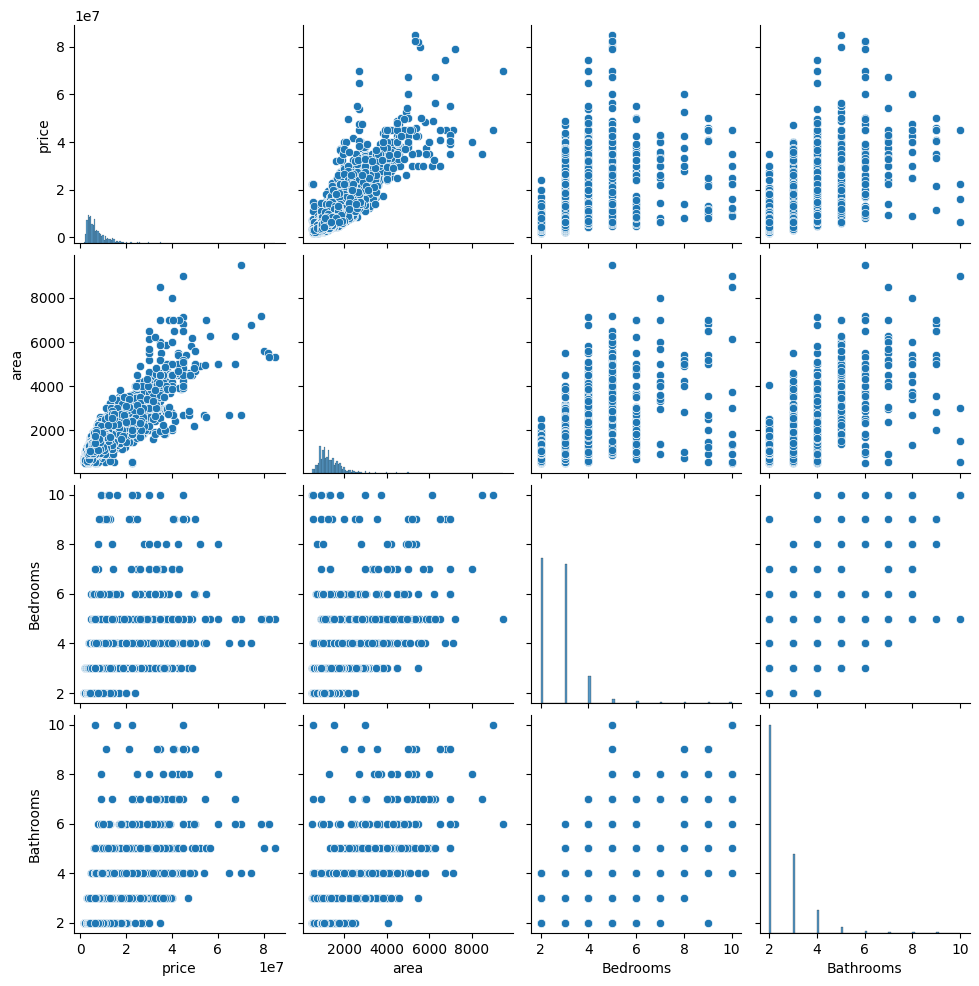

In [60]:
sns.pairplot(raw_df)

In [61]:
fig = px.scatter(raw_df,x='area',y='price',color='Furnished_status',opacity=0.7)
fig.show()

In [62]:
fig = px.scatter(raw_df,x='area',y='price',color='Status',opacity=0.7)
fig.show()

In [63]:
fig = px.violin(raw_df, x="Bedrooms", y="price")
fig.show()

In [64]:
fig = px.violin(raw_df, x="Bathrooms", y="price")
fig.show()

In [65]:
# updated numerical and categorical columns
numerical_cols = raw_df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include = object).columns.tolist()

In [66]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   Bedrooms          7738 non-null   float64
 3   Bathrooms         7738 non-null   float64
 4   Status            7164 non-null   object 
 5   neworold          7738 non-null   object 
 6   Furnished_status  4124 non-null   object 
 7   type_of_building  7738 non-null   object 
dtypes: float64(4), object(4)
memory usage: 483.8+ KB


X, Y SPLIT

In [67]:
# identifyng dependent variable : y and independent variables : x
y = raw_df['price']
x = raw_df.drop('price',axis=1)

ONE-HOT ENCODING

In [68]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [69]:
encoder.fit(x[categorical_cols])

/Users/chiraggoel/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [70]:
encoded_cols = encoder.get_feature_names_out(categorical_cols).tolist()

In [71]:
x[encoded_cols] = encoder.transform(x[categorical_cols])

In [72]:
x.drop(categorical_cols,axis=1,inplace=True)

STANDARDIZING THE DATA

In [73]:
scaler = StandardScaler()

In [74]:
numerical_cols.remove("price")
scaler.fit(x[numerical_cols])

StandardScaler()

In [75]:
x[numerical_cols] = scaler.transform(x[numerical_cols])

In [76]:
x.head()

,area,Bedrooms,Bathrooms,Status_Ready to Move,Status_Under Construction,Status_nan,neworold_New Property,neworold_Resale,Furnished_status_Furnished,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,Furnished_status_nan,type_of_building_Flat,type_of_building_Individual House
0,-0.082776,0.332745,0.575364,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.111970,0.332745,0.575364,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.356957,1.473036,2.882185,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.500090,-0.807547,-0.578047,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.082776,-0.807547,-0.578047,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   area                               7738 non-null   float64
 1   Bedrooms                           7738 non-null   float64
 2   Bathrooms                          7738 non-null   float64
 3   Status_Ready to Move               7738 non-null   float64
 4   Status_Under Construction          7738 non-null   float64
 5   Status_nan                         7738 non-null   float64
 6   neworold_New Property              7738 non-null   float64
 7   neworold_Resale                    7738 non-null   float64
 8   Furnished_status_Furnished         7738 non-null   float64
 9   Furnished_status_Semi-Furnished    7738 non-null   float64
 10  Furnished_status_Unfurnished       7738 non-null   float64
 11  Furnished_status_nan               7738 non-null   float

PERFORMING TRAIN TEST SPLIT

In [78]:
# splitting dataframe into training and testing dataframes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
print("SHAPE OF x_train: ",x_train.shape)
print("SHAPE OF x_test: ",x_test.shape)


SHAPE OF x_train:  (6190, 14)
SHAPE OF x_test:  (1548, 14)


CREATING HELPER FUNCTION

In [80]:
# function returning a dictionnary for a particular models for the following erroes
def evaluations(y,predictions,model_name):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_absolute_error(y,predictions))
    r_squared = r2_score(y,predictions)
    row = {"MODEL":model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2_SCORE": r_squared}
    return row

In [81]:
# creating dataframe to evaluate different models on basis of errors
evaluation_df = pd.DataFrame(columns=["MODEL","MAE","MSE","RMSE","R2_SCORE"])

LINEAR REGRESSION

In [82]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_preds = linear_reg.predict(x_test)
linear_reg_row = evaluations(y_test,linear_reg_preds,"LINEAR REGRESSION")
evaluation_df = pd.concat([evaluation_df, pd.DataFrame([linear_reg_row])],ignore_index=True)
print(evaluation_df)



               MODEL           MAE           MSE         RMSE  R2_SCORE
0  LINEAR REGRESSION  2.387365e+06  1.687253e+13  1545.109956  0.715393


RIDGE REGRESSION

In [83]:
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)
ridge_reg_preds = ridge_reg.predict(x_test)
ridge_reg_row = evaluations(y_test, ridge_reg_preds, "RIDGE REGRESSION")
evaluation_df = pd.concat([evaluation_df, pd.DataFrame([ridge_reg_row])], ignore_index=True)
print(evaluation_df)

               MODEL           MAE           MSE         RMSE  R2_SCORE
0  LINEAR REGRESSION  2.387365e+06  1.687253e+13  1545.109956  0.715393
1   RIDGE REGRESSION  2.389150e+06  1.686860e+13  1545.687452  0.715460


LASSO REGRESSION 

In [84]:
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)
lasso_reg_preds = lasso_reg.predict(x_test)
lasso_reg_row = evaluations(y_test, lasso_reg_preds, "LASSO REGRESSION")
evaluation_df = pd.concat([evaluation_df, pd.DataFrame([lasso_reg_row])], ignore_index=True)
print(evaluation_df)

               MODEL           MAE           MSE         RMSE  R2_SCORE
0  LINEAR REGRESSION  2.387365e+06  1.687253e+13  1545.109956  0.715393
1   RIDGE REGRESSION  2.389150e+06  1.686860e+13  1545.687452  0.715460
2   LASSO REGRESSION  2.389357e+06  1.686894e+13  1545.754548  0.715454


RANDOM FOREST REGRESSOR

In [85]:
forest = RandomForestRegressor(max_depth=10)
forest.fit(x_train,y_train)
forest_preds = forest.predict(x_test)
forest_row = evaluations(y_test, forest_preds, "RANDOM FOREST")
evaluation_df = pd.concat([evaluation_df, pd.DataFrame([forest_row])], ignore_index=True)
print(evaluation_df)


               MODEL           MAE           MSE         RMSE  R2_SCORE
0  LINEAR REGRESSION  2.387365e+06  1.687253e+13  1545.109956  0.715393
1   RIDGE REGRESSION  2.389150e+06  1.686860e+13  1545.687452  0.715460
2   LASSO REGRESSION  2.389357e+06  1.686894e+13  1545.754548  0.715454
3      RANDOM FOREST  2.064897e+06  1.223717e+13  1436.975012  0.793583


SUPPORT VECTOR MACHINE

In [86]:
svr_reg = SVR(C=10000000)
svr_reg.fit(x_train,y_train)
svr_reg_preds = svr_reg.predict(x_test)
svr_reg_row = evaluations(y_test, svr_reg_preds, "SUPPORT VECTOR REGRESSOR")
evaluation_df = pd.concat([evaluation_df, pd.DataFrame([svr_reg_row])], ignore_index=True)
print(evaluation_df)

                      MODEL           MAE           MSE         RMSE  R2_SCORE
0         LINEAR REGRESSION  2.387365e+06  1.687253e+13  1545.109956  0.715393
1          RIDGE REGRESSION  2.389150e+06  1.686860e+13  1545.687452  0.715460
2          LASSO REGRESSION  2.389357e+06  1.686894e+13  1545.754548  0.715454
3             RANDOM FOREST  2.064897e+06  1.223717e+13  1436.975012  0.793583
4  SUPPORT VECTOR REGRESSOR  2.104130e+06  1.482270e+13  1450.562076  0.749970


EVALUATION DATAFRAME


In [87]:
evaluation_df.sort_values(by="RMSE")

,MODEL,MAE,MSE,RMSE,R2_SCORE
3,RANDOM FOREST,2.064897e+06,1.223717e+13,1436.975012,0.793583
4,SUPPORT VECTOR REGRESSOR,2.104130e+06,1.482270e+13,1450.562076,0.749970
0,LINEAR REGRESSION,2.387365e+06,1.687253e+13,1545.109956,0.715393
1,RIDGE REGRESSION,2.389150e+06,1.686860e+13,1545.687452,0.715460
2,LASSO REGRESSION,2.389357e+06,1.686894e+13,1545.754548,0.715454


COMPARISION OF MODELS

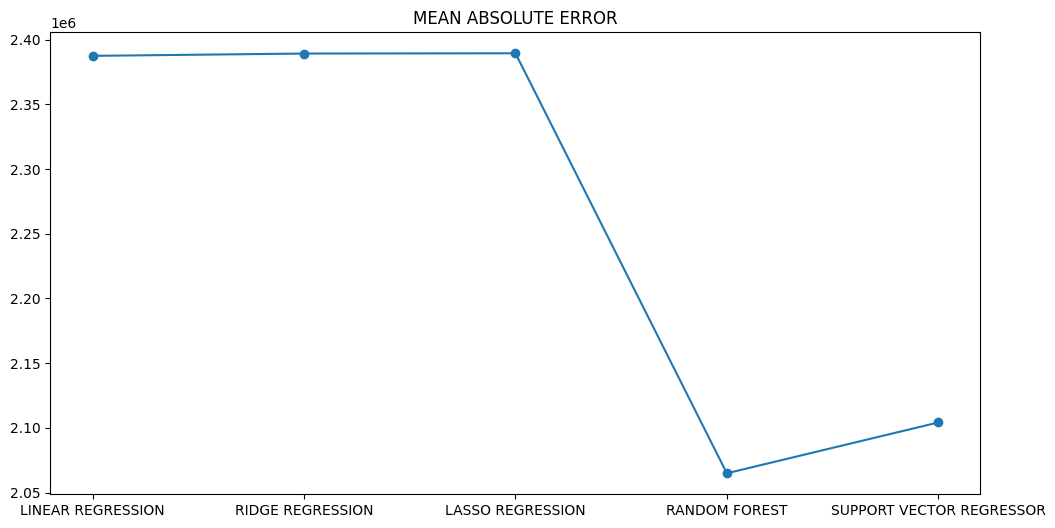

In [88]:
plt.figure(figsize=(12,6))
plt.plot(evaluation_df['MODEL'],evaluation_df['MAE'], marker = 'o')
plt.title("MEAN ABSOLUTE ERROR")
plt.show()

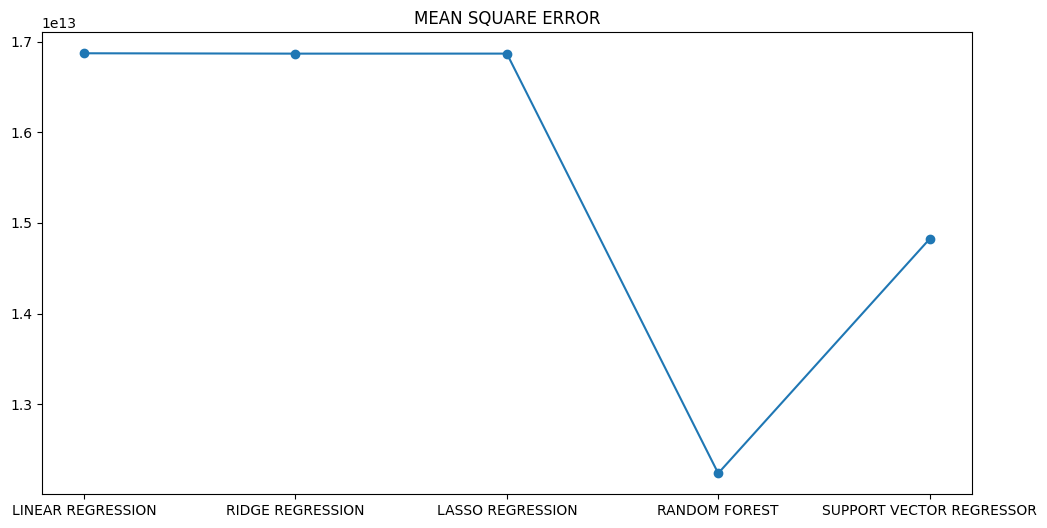

In [89]:
plt.figure(figsize=(12,6))
plt.plot(evaluation_df['MODEL'],evaluation_df['MSE'], marker='o')
plt.title("MEAN SQUARE ERROR")
plt.show()

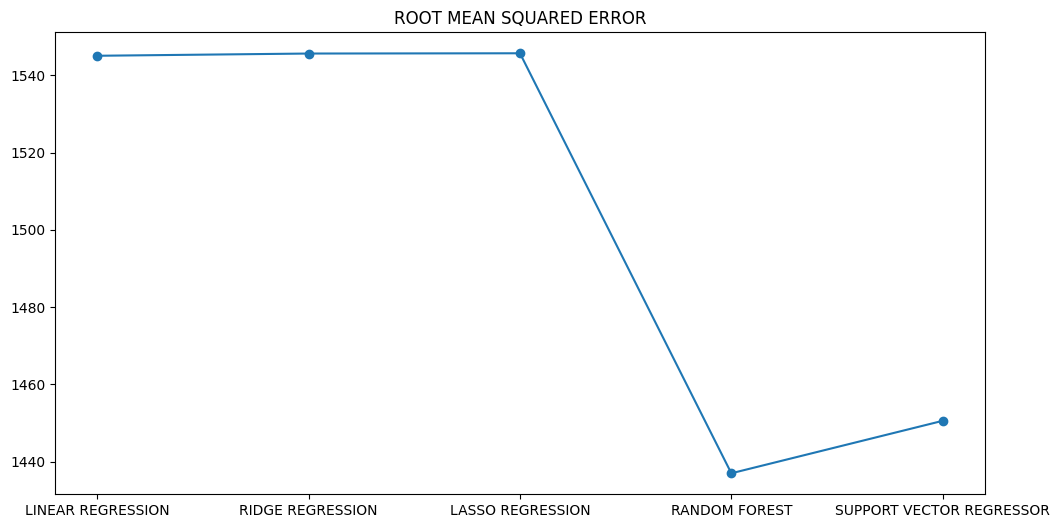

In [90]:
plt.figure(figsize=(12,6))
plt.plot(evaluation_df['MODEL'],evaluation_df['RMSE'],marker='o')
plt.title("ROOT MEAN SQUARED ERROR")
plt.show()

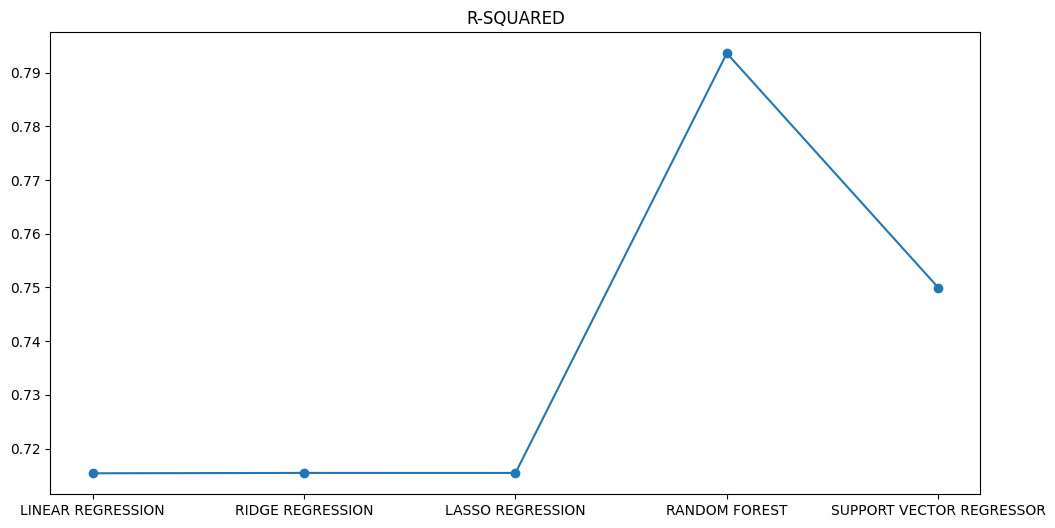

In [91]:
plt.figure(figsize=(12,6))
plt.plot(evaluation_df['MODEL'],evaluation_df['R2_SCORE'], marker = 'o')
plt.title("R-SQUARED")
plt.show()